# 크롤링, 이미지처리, 데이터 분석 시각화 프로그램 만들기
## 19. 구글 이미지 크롤링

In [ ]:
conda install -c conda-forge selenium

In [ ]:
conda install -c conda-forge webdriver-manager

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

driver = webdriver.Chrome(ChromeDriverManager().install())

URL='https://www.google.co.kr/imghp'
driver.get(url=URL)

driver.implicitly_wait(time_to_wait=10)



====== WebDriver manager ======
Could not get version for google-chrome.Is google-chrome installed?
Get LATEST chromedriver version for None google-chrome
Driver [C:\Users\r2com\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache
C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\2065062032.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
from selenium.webdriver.common.keys import Keys

elem = driver.find_element_by_css_selector("#sbtc > div > div.a4bIc > input")
elem.send_keys("하늘")
elem.send_keys(Keys.RETURN)

C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\3222102828.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_css_selector("#sbtc > div > div.a4bIc > input")


In [4]:
import time
elem = driver.find_element_by_tag_name("body") # body 부분
for i in range(10):     # 페이지 다운 횟수
    elem.send_keys(Keys.PAGE_DOWN) 
    time.sleep(0.1)

try:    # 결과더보기 - selector
    driver.find_element_by_css_selector('#islmp > div > div > div > div.gBPM8 > div.qvfT1 > div.YstHxe > input').click() 
    
    for i in range(10): 
        elem.send_keys(Keys.PAGE_DOWN) 
        time.sleep(0.1) 
except: 
    pass

C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\1595577712.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_tag_name("body")
C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\1595577712.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#islmp > div > div > div > div.gBPM8 > div.qvfT1 > div.YstHxe > input').click()


In [5]:
links=[]
# 이미지의 원소 모두 찾기 - css_selector
images = driver.find_elements_by_css_selector("#islrg > div.islrc > div > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")

for image in images:
    if image.get_attribute('src') is not None:
        links.append(image.get_attribute('src'))
        
print(' 찾은 이미지 개수:',len(links))

C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\1721841977.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  images = driver.find_elements_by_css_selector("#islrg > div.islrc > div > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")


 찾은 이미지 개수: 120


In [7]:
# 위와 동일한 결과
images = driver.find_elements_by_css_selector("#islrg > div.islrc > div > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")

links=[image.get_attribute('src') for image in images if image.get_attribute('src') is not None] 
        
print(' 찾은 이미지 개수:',len(links))

C:\Users\r2com\AppData\Local\Temp\ipykernel_6200\2524146522.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  images = driver.find_elements_by_css_selector("#islrg > div.islrc > div > a.wXeWr.islib.nfEiy > div.bRMDJf.islir > img")


 찾은 이미지 개수: 120


In [8]:
import urllib.request   # 파이썬 내장 모듈

#for k,i in enumerate(links):
#    url = i
for k,i in enumerate(links[:30]):   # 30개만 저장
    urllib.request.urlretrieve(url, "files/사진다운로드/"+str(k)+".jpg")

print('다운로드 완료하였습니다.')

다운로드 완료하였습니다.


In [ ]:
conda install -c conda-forge nbconvert

In [ ]:
jupyter nbconvert --to script main19.ipynb

## 23. 사진에 얼굴만 찾아 모자이크처리(OpenCV)

In [ ]:
pip install opencv-python

In [10]:
import numpy as np
import cv2

# 얼굴과 눈을 찾기 위한 OpenCV 알고리즘
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_casecade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

ff = np.fromfile('files/샘플사진.jpg', np.uint8)    # 한글경로 >  numpy로 불러오기
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)        # imdecode : numpy 이미지 파일을 OpenCV로 불러오기
img = cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR) # 비율조절

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 회색조 처리

faces = face_cascade.detectMultiScale(gray, 1.2,5)
for (x,y,w,h) in faces:     # 얼굴 찾기
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_casecade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(0,255,0),2)

cv2.imshow('face find', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_casecade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

ff = np.fromfile('files/샘플사진.jpg', np.uint8)
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED) 
img = cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.2,5)
for (x,y,w,h) in faces:
    face_img = img[y:y+h, x:x+w]    # 얼굴 자르기
    face_img = cv2.resize(face_img, dsize=(0, 0), fx=0.1, fy=0.1)  # 이미지 축소
    face_img = cv2.resize(face_img, (w, h), interpolation=cv2.INTER_AREA)  # 이미지 확대
    img[y:y+h, x:x+w] = face_img

cv2.imshow('face find', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 24. 사진을 그림으로 변환하기(OpenCV)

In [14]:
import numpy as np
import cv2

ff = np.fromfile('files\여행사진.jpg', np.uint8)
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED) 
img = cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR)

cartoon_img = cv2.stylization(img, sigma_s=100, sigma_r=0.1)  

cv2.imshow('cartoon view', cartoon_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
import numpy as np
import cv2

ff = np.fromfile('files\여행사진.jpg', np.uint8)
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR)

def onChange(pos):
    pass

cv2.namedWindow("Trackbar Windows")

cv2.createTrackbar("sigma_s", "Trackbar Windows", 0, 200, onChange)
cv2.createTrackbar("sigma_r", "Trackbar Windows", 0, 100, onChange)

cv2.setTrackbarPos("sigma_s", "Trackbar Windows", 100)
cv2.setTrackbarPos("sigma_r", "Trackbar Windows", 10)

while True:
    
    if cv2.waitKey(100) == ord('q'):
        break
    
    sigma_s_value = cv2.getTrackbarPos("sigma_s", "Trackbar Windows")
    sigma_r_value = cv2.getTrackbarPos("sigma_r", "Trackbar Windows") / 100.0

    print("sigma_s_value:",sigma_s_value)
    print("sigma_r_value:",sigma_r_value)

    cartoon_img = cv2.stylization(img, sigma_s=sigma_s_value, sigma_r=sigma_r_value)  

    cv2.imshow("Trackbar Windows", cartoon_img)

cv2.destroyAllWindows() 


sigma_s_value: 100
sigma_r_value: 0.1
sigma_s_value: 100
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 63
sigma_r_value: 0.1
sigma_s_value: 35
sigma_r_value: 0.1
sigma_s_value: 0
sigma_r_value: 0.1
sigma_s_value: 40
sigma_r_value: 0.1
sigma_s_value: 120
sigma_r_value: 0.1
sigma_s_value: 160
sigma_r_value: 0.3
sigma_s_value: 160
sigma_r_value: 0.5


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Trackbar Windows' in function 'cvGetTrackbarPos'


## 26. 로또번호 시각화하기

In [16]:
import pandas as pd

file_path = 'files/lotto.xlsx'
df_from_excel = pd.read_excel(file_path,engine='openpyxl')

df_from_excel = df_from_excel.drop(index=[0,1])

df_from_excel.columns = [
                        '년도', '회차','추첨일','1등당첨자수',
                        '1등당첨금액','2등당첨자수','2등당첨금액','3등당첨자수',
                        '3등당첨금액','4등당첨자수','4등당첨금액','5등당첨자수',
                        '5등당첨금액','당첨번호1','당첨번호2','당첨번호3',
                        '당첨번호4','당첨번호5','당첨번호6','보너스번호'
                        ]

print(df_from_excel.head())

print(df_from_excel['회차'].values)

print(df_from_excel['1등당첨금액'].values)

     년도   회차         추첨일 1등당첨자수          1등당첨금액 2등당첨자수       2등당첨금액 3등당첨자수  \
2  2021  991  2021.11.27      8  2,904,166,032원    110  35,202,013원   2969   
3   NaN  990  2021.11.20     14  1,740,095,277원     56  72,503,970원   2858   
4   NaN  989  2021.11.13      4  5,826,768,563원     63  61,658,927원   2444   
5   NaN  988  2021.11.06      9  2,678,489,375원     61  65,864,493원   2663   
6   NaN  987  2021.10.30     10  2,378,711,625원     73  54,308,485원   2968   

       3등당첨금액  4등당첨자수   4등당첨금액   5등당첨자수  5등당첨금액 당첨번호1  당첨번호2  당첨번호3  당첨번호4  \
2  1,304,218원  138068  50,000원  2226394  5,000원    13   18.0   25.0   31.0   
3  1,420,652원  129113  50,000원  2169219  5,000원     2    4.0   25.0   26.0   
4  1,589,408원  127891  50,000원  2158436  5,000원    17   18.0   21.0   27.0   
5  1,508,725원  129322  50,000원  2139025  5,000원     2   13.0   20.0   30.0   
6  1,335,755원  140004  50,000원  2283682  5,000원     2    4.0   15.0   23.0   

   당첨번호5  당첨번호6 보너스번호  
2   33.0   44.0    38  
3   36.0   37.

         1등당첨금액     2등당첨금액   3등당첨금액  4등당첨금액  5등당첨금액
2    2904166032   35202013  1304218   50000    5000
3    1740095277   72503970  1420652   50000    5000
4    5826768563   61658927  1589408   50000    5000
5    2678489375   65864493  1508725   50000    5000
6    2378711625   54308485  1335755   50000    5000
..          ...        ...      ...     ...     ...
988           0          0  6033800  166500   10000
989           0  211191200  7282400  152100   10000
990  2000000000          0  1174100   54900   10000
991  2002006800   94866800  1842000  100800   10000
992           0  143934100  5140500  113400   10000

[991 rows x 5 columns]


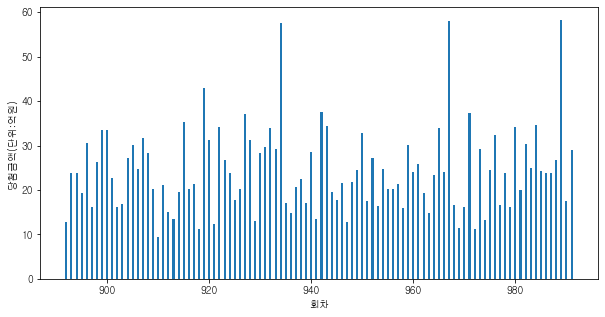

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

file_path = 'files/lotto.xlsx'
df_from_excel = pd.read_excel(file_path,engine='openpyxl')

df_from_excel = df_from_excel.drop(index=[0,1])

df_from_excel.columns = [
                        '년도', '회차','추첨일','1등당첨자수',
                        '1등당첨금액','2등당첨자수','2등당첨금액','3등당첨자수',
                        '3등당첨금액','4등당첨자수','4등당첨금액','5등당첨자수',
                        '5등당첨금액','당첨번호1','당첨번호2','당첨번호3',
                        '당첨번호4','당첨번호5','당첨번호6','보너스번호'
                        ]

df_from_excel['1등당첨금액']=df_from_excel['1등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+', repl= r'', regex=True)
df_from_excel['2등당첨금액']=df_from_excel['2등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+', repl= r'', regex=True)
df_from_excel['3등당첨금액']=df_from_excel['3등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+', repl= r'', regex=True)
df_from_excel['4등당첨금액']=df_from_excel['4등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+', repl= r'', regex=True)
df_from_excel['5등당첨금액']=df_from_excel['5등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+', repl= r'', regex=True)

df_from_excel["1등당첨금액"] = pd.to_numeric(df_from_excel["1등당첨금액"])
df_from_excel["2등당첨금액"] = pd.to_numeric(df_from_excel["2등당첨금액"])
df_from_excel["3등당첨금액"] = pd.to_numeric(df_from_excel["3등당첨금액"])
df_from_excel["4등당첨금액"] = pd.to_numeric(df_from_excel["4등당첨금액"])
df_from_excel["5등당첨금액"] = pd.to_numeric(df_from_excel["5등당첨금액"])

print( df_from_excel[['1등당첨금액','2등당첨금액','3등당첨금액','4등당첨금액','5등당첨금액']] )

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

x = df_from_excel['회차'].iloc[:100].values
price = df_from_excel['1등당첨금액'].iloc[:100].values / 100000000

plt.figure(figsize=(10, 5))
plt.xlabel('회차') 
plt.ylabel('당첨금액(단위:억원)') 

plt.bar(x, price, width=0.4)

plt.show()

In [19]:
import pandas as pd
from collections import Counter

file_path = 'files/lotto.xlsx'
df_from_excel = pd.read_excel(file_path,engine='openpyxl')

df_from_excel = df_from_excel.drop(index=[0,1])

df_from_excel.columns = [
                        '년도', '회차','추첨일','1등당첨자수',
                        '1등당첨금액','2등당첨자수','2등당첨금액','3등당첨자수',
                        '3등당첨금액','4등당첨자수','4등당첨금액','5등당첨자수',
                        '5등당첨금액','당첨번호1','당첨번호2','당첨번호3',
                        '당첨번호4','당첨번호5','당첨번호6','보너스번호'
                        ]

num_list = list(df_from_excel['당첨번호1'].astype(int))
num_list += list(df_from_excel['당첨번호2'].astype(int))
num_list += list(df_from_excel['당첨번호3'].astype(int))
num_list += list(df_from_excel['당첨번호4'].astype(int))
num_list += list(df_from_excel['당첨번호5'].astype(int))
num_list += list(df_from_excel['당첨번호6'].astype(int))

count = Counter(num_list)
most_num = count.most_common(45)

print(most_num)

[(34, 152), (43, 145), (27, 144), (18, 144), (13, 142), (17, 142), (39, 141), (40, 141), (12, 140), (1, 139), (37, 139), (10, 138), (14, 138), (33, 138), (20, 137), (4, 136), (45, 136), (2, 135), (21, 135), (31, 135), (36, 134), (11, 133), (15, 133), (3, 132), (19, 132), (44, 132), (7, 131), (24, 131), (26, 131), (38, 131), (5, 130), (8, 129), (16, 129), (42, 129), (25, 128), (6, 123), (35, 123), (28, 123), (41, 123), (23, 121), (29, 121), (30, 120), (22, 113), (32, 112), (9, 105)]


## 27. 전국의 대학교 위치 시각화하기

In [ ]:
import pandas as pd

filePath = 'files/고등교육기관 하반기 주소록(2020).xlsx'
df_from_excel = pd.read_excel(filePath,engine='openpyxl')

df_from_excel.columns = df_from_excel.loc[4].tolist()

df_from_excel = df_from_excel.drop(index=list(range(0,5)))

print(df_from_excel.head())

print(df_from_excel['학교명'].values)

print(df_from_excel['주소'].values)

In [ ]:
import requests

url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'ROAD'   #도로명주소
road_type2 = 'PARCEL' #지번주소
address = '&address='
keys = '&key='
primary_key = 'B3297F1A-FC77-37B4-BA2C-7C7B109E776C'

def request_geo(road):
    page = requests.get(url+params+road_type+address+road+keys+primary_key)
    json_data = page.json()
    if json_data['response']['status'] == 'OK':
        x = json_data['response']['result']['point']['x']
        y = json_data['response']['result']['point']['y']
        return x,y
    else:
        x = 0
        y = 0
        return x,y

x,y = request_geo("경기도 시흥시 산기대학로 237 (정왕동, 한국산업기술대학교)")

print(f'x값: {x}')
print(f'y값: {y}')

In [ ]:
import pandas as pd
import requests
from openpyxl import load_workbook
from openpyxl import Workbook
import re


filePath = 'files/고등교육기관 하반기 주소록(2020).xlsx'
df_from_excel = pd.read_excel(filePath,engine='openpyxl')
df_from_excel.columns = df_from_excel.loc[4].tolist()
df_from_excel = df_from_excel.drop(index=list(range(0,5)))


url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'ROAD'   #도로명주소
road_type2 = 'PARCEL' #지번주소
address = '&address='
keys = '&key='
primary_key = 'B3297F1A-FC77-37B4-BA2C-7C7B109E776C'

def request_geo(road):
    page = requests.get(url+params+road_type+address+road+keys+primary_key)
    json_data = page.json()
    if json_data['response']['status'] == 'OK':
        x = json_data['response']['result']['point']['x']
        y = json_data['response']['result']['point']['y']
        return x,y
    else:
        x = 0
        y = 0
        return x,y


try:
    wb = load_workbook('files/학교주소좌표.xlsx', data_only=True)
    sheet  = wb.active
except:
    wb = Workbook()
    sheet = wb.active

university_list = df_from_excel['학교명'].to_list()
address_list = df_from_excel['주소'].to_list()

for num,value in enumerate(address_list):
    addr = re.sub(r'\([^)]*\)', '', value)
    print(addr)
    x,y = request_geo(addr)
    sheet.append([university_list[num],addr,x,y])

wb.save('files/학교주소좌표.xlsx')

In [ ]:
import folium

map = folium.Map(location=[37,127],zoom_start=7)

marker = folium.Marker([37.341435483, 126.733026596],
                    popup='한국공학대학교', 
                    icon = folium.Icon(color='blue'))

marker.add_to(map) 

map.save('files/uni_map.html')

In [ ]:
import pandas as pd
import folium

filePath = 'files/학교주소좌표.xlsx'
df_from_excel = pd.read_excel(filePath,engine='openpyxl',header=None)

df_from_excel.columns = ['학교이름','주소','x','y']

name_list = df_from_excel['학교이름'].to_list()
addr_list = df_from_excel['주소'].to_list()
position_x_list = df_from_excel['x'].to_list()
position_y_list = df_from_excel['y'].to_list()

map = folium.Map(location=[37,127],zoom_start=7)

for i in range(len(name_list)):
    if position_x_list[i] != 0:
        marker = folium.Marker([position_y_list[i],position_x_list[i]],
                            popup=name_list[i], 
                            icon = folium.Icon(color='blue'))
        marker.add_to(map) 

map.save('files/uni_map.html')

# 웹 페이지 제작 및 GUI 프로그램 만들기
## 28. 플라스크 웹서버 만들기

In [ ]:
conda install -c conda-forge flask

In [20]:
import greeting

__name__ 속성값은 greeting


In [22]:
print(__name__)

__main__


In [24]:
import greeting
greeting.hi()

안녕


In [26]:
from importlib import reload    # 모듈 수정한 후 reload

reload(greeting)
greeting.hi()

__name__ 속성값은 greeting
안녕, 내일 봐


In [5]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello():
    return "hello"

def main():
#    app.run(debug=True,port=80)
    app.run()
    
if __name__== '__main__':
    main()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8000 (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

In [12]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello():
    return "hello"

@app.route('/1')
def test1page():
    return "1page ok"

@app.route('/2')
def test2page():
    return "2page ok"

def main():
    #app.run(debug=True, port=80)
    app.run()
    
if __name__== '__main__':
    main()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


In [13]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def hello():
    return "hello"

@app.route('/map')
def map():
    return render_template("uni_map.html")

def main():
    #app.run(debug=True, port=80)
    app.run()
    
if __name__== '__main__':
    main()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


## 30. 가상화폐 금액표시 GUI 프로그램 만들기

In [1]:
import tkinter

window = tkinter.Tk()
window.title("가상화폐 금액표시")
window.geometry("400x200")
window.resizable(False,False)

label=tkinter.Label(window, text="hello")
label.pack()

window.mainloop()


In [2]:
import tkinter
import tkinter.font

window = tkinter.Tk()
window.title("가상화폐 금액표시")
window.geometry("400x200")
window.resizable(False,False)

font = tkinter.font.Font(size = 30)
label=tkinter.Label(window, text="hello", font=font)
label.pack()

window.mainloop()

In [15]:
import tkinter
import tkinter.font

window = tkinter.Tk()
window.title("가상화폐 금액표시")
window.geometry("400x200")
window.resizable(False,False)

font = tkinter.font.Font(size = 30)
label=tkinter.Label(window, text="", font=font)
label.pack()

cnt = 0
def get_coin_1sec():
    global cnt
    now_btc_price = str(cnt)
    cnt = cnt + 1
    label.config(text=now_btc_price)
    window.after(1000,get_coin_1sec)

get_coin_1sec()

window.mainloop()

KeyboardInterrupt: 

In [16]:
def show():
    print(str(cnt))

show()

9


: 

In [ ]:
import tkinter
import tkinter.font
import pyupbit
import threading
import time

coin_price = 0
def get_coin_price():
    global coin_price
    while True:
        coin_price = pyupbit.get_current_price("KRW-BTC")
        time.sleep(1.0)
        
t1 = threading.Thread(target=get_coin_price)
t1.daemon = True
t1.start()

window = tkinter.Tk()
window.title("비트코인 실시간 가격")
window.geometry("400x50")
window.resizable(False,False)

font = tkinter.font.Font(size = 30)
label=tkinter.Label(window, text="", font=font)
label.pack()

def get_coin_1sec():
    global coin_price
    now_btc_price = str(coin_price)
    label.config(text=now_btc_price)
    window.after(1000,get_coin_1sec)

get_coin_1sec()

window.mainloop()